##utility NB for darts gaussian distribution plot UI class 3
##FBB August 2015

In [1]:
import os
import pylab as pl
import numpy as np

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
N=10000
def circlepoint(r,c,theta):
    return()
def circle(r,c):
    cx,cy=np.zeros(N),np.zeros(N)
    for i,x in enumerate(np.linspace(c[0]-r,c[0]+r,N)):
        cx[i]=x
        cy[i]=np.sqrt(r**2-(x-c[0])**2)+c[1]
    return cx,cy
        
def wedges(r,c,nw,v,mod):
    cx,cy=np.zeros(N),np.zeros(N)
    ii=0
    for i,x in enumerate(np.linspace(c[0]-r,c[0]+r,N)):
        y=np.sqrt(r**2-(x-c[0])**2)+c[1]
        theta=np.arctan(y/x)
        if int((theta*180/np.pi/360.+v)*nw)%2==mod:
            #print "hrtr",theta, int(theta*180/np.pi/360.*nw)%2
            cx[ii]=x
            cy[ii]=y
            ii+=1
    return cx,cy  

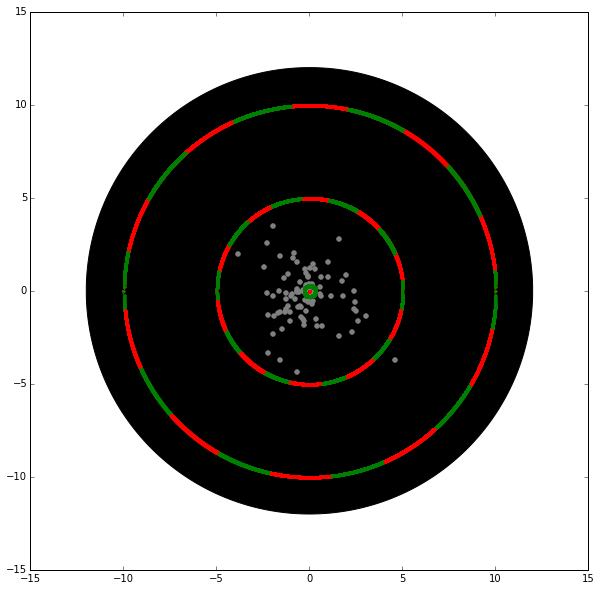

In [3]:

fig=pl.figure(figsize=(10,10))
mycircle=circle(12,[0,0])
pl.fill_between(mycircle[0],mycircle[1]*(-1),mycircle[1],where=mycircle[1]>mycircle[1]*(-1.0),color='black')
mycircleout=circle(10,[0,0])
pl.plot(mycircleout[0],-mycircleout[1],'.',color='green')
pl.plot(mycircleout[0],mycircleout[1],'.',color='red')
mycirclein=circle(5,[0,0])
pl.plot(mycirclein[0],-mycirclein[1],'.',color='green')
pl.plot(mycirclein[0],mycirclein[1],'.',color='red')
mywedges=wedges(5,[0,0],20,360./27,0)
pl.plot(mywedges[0],mywedges[1],'.',color='green')
mywedges=wedges(5,[0,0],20,-360./27,1)
pl.plot(mywedges[0],-mywedges[1],'.',color='red')

mywedges=wedges(10,[0,0],20,360./27,0)
pl.plot(mywedges[0],mywedges[1],'.',color='green')
mywedges=wedges(10,[0,0],20,-360./27,1)
pl.plot(mywedges[0],-mywedges[1],'.',color='red')
mycircleinner=circle(0.3,[0,0])
pl.plot(mycircleinner[0],-mycircleinner[1],'.',color='green')
pl.plot(mycircleinner[0],mycircleinner[1],'.',color='green')

rs=2*np.random.randn(100)-0.5

for i,f in enumerate(range(100)):
    
    theta=(np.random.rand()*np.pi)
    pl.scatter(rs[i]*np.cos(theta),rs[i]*np.sin(theta),color='gray')
    pl.savefig(os.getenv('PUI15PLOTS')+'/board_%02d.png'%f, transparent=True)  
    

(array([  1.,   3.,   5.,  15.,  20.,  22.,  17.,  11.,   3.,   3.]), array([-5.92331455, -4.90170853, -3.88010251, -2.85849649, -1.83689046,
       -0.81528444,  0.20632158,  1.2279276 ,  2.24953362,  3.27113965,
        4.29274567]), <a list of 10 Patch objects>)


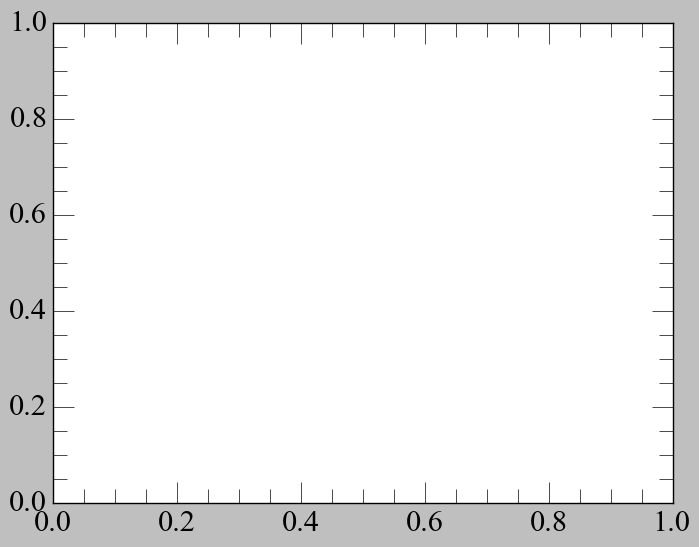

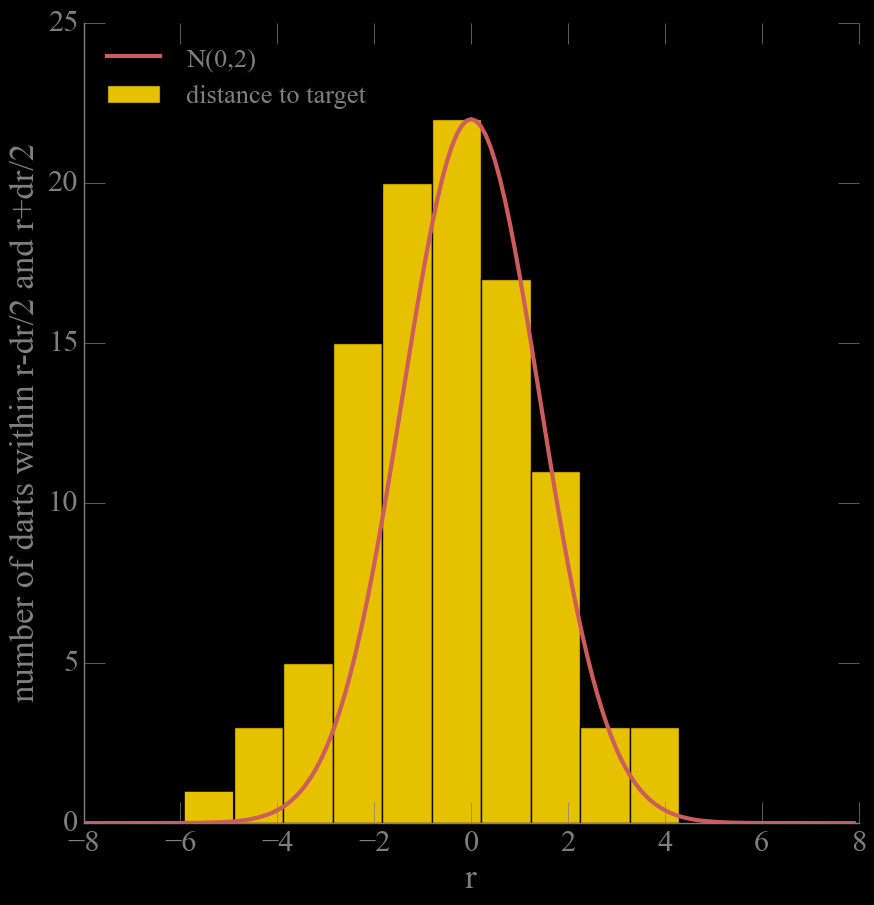

In [4]:
#pl.xkcd()
pl.rcdefaults()
import pylabsetup
fig=pl.figure(figsize=(10,10))
ax=fig.add_subplot(111, axisbg='black')
h=ax.hist(rs,bins=10, color='gold', label='distance to target', alpha=0.9)
print h
ax.plot(np.arange(-8,8,0.1),max(h[0])*np.exp(-(np.arange(-8,8,0.1)**2)/4.0),'k-', lw=3, color='IndianRed', label='N(0,2)')
l=pl.legend(loc=2, fontsize=19,frameon=False)
for text in l.get_texts():
    text.set_color("gray")
ax.spines['bottom'].set_color('gray')
#ax.spines['top'].set_color('red')
ax.xaxis.label.set_color('gray')
ax.tick_params(axis='y', colors='gray')
ax.tick_params(axis='x', colors='gray')
ax.spines['left'].set_color('gray')
#ax.spines['top'].set_color('red')
fig.patch.set_facecolor('black')

ax.yaxis.label.set_color('gray')
ax.set_xlabel('r', fontsize=25)
ax.set_ylabel('number of darts within r-dr/2 and r+dr/2', fontsize=25, color='gray')
pl.savefig(os.getenv('PUI15PLOTS')+'/gaussian_darts_distrib.png', color='black',facecolor=fig.get_facecolor(), edgecolor='none')
